In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
usdc = pd.read_csv("clean_data/cleaned_usdc.csv", sep=",")
ustc = pd.read_csv("clean_data/cleaned_ustc.csv", sep=",")

In [6]:
usdc.columns.to_list()

['date',
 'open',
 'close',
 'high',
 'low',
 'volume',
 'marketCap',
 'circulatingSupply',
 'timeOpen',
 'timeClose',
 'timeHigh',
 'timeLow',
 'name',
 'timestamp',
 'price_dev',
 'abs_price_dev',
 'rel_price_dev',
 'intraday_range',
 'downside_dev',
 'ret_1d',
 'vol_7d',
 'supply_chg',
 'mcap_chg',
 'mcap_velocity',
 'supply_panic',
 'volume_mcap_ratio',
 'timing_asymmetry_hours',
 'recovery_time_hours',
 'collapse_time_hours',
 'dev_acceleration',
 'peg_stable_days',
 'peg_breakdown',
 'price_shock',
 'volume_explosion']

In [7]:
ustc.columns.to_list()

['date',
 'name',
 'open',
 'high',
 'low',
 'close',
 'volume',
 'marketCap',
 'circulatingSupply',
 'price_dev',
 'abs_price_dev',
 'rel_price_dev',
 'intraday_range_pct',
 'volatility_7d',
 'volume_zscore',
 'volume_acceleration',
 'turnover',
 'range_expansion',
 'supply_chg',
 'mcap_chg',
 'mcap_velocity',
 'supply_panic',
 'volume_mcap_ratio',
 'dev_acceleration',
 'peg_stable_days',
 'peg_breakdown',
 'price_shock',
 'volume_explosion']

In [8]:
#merge both datasets
data = pd.merge(ustc, usdc, on='date', suffixes=('_ustc', '_usdc'))
data.head()

,date,name_ustc,open_ustc,high_ustc,low_ustc,close_ustc,volume_ustc,marketCap_ustc,circulatingSupply_ustc,price_dev_ustc,...,supply_panic_usdc,volume_mcap_ratio_usdc,timing_asymmetry_hours,recovery_time_hours,collapse_time_hours,dev_acceleration_usdc,peg_stable_days_usdc,peg_breakdown_usdc,price_shock_usdc,volume_explosion_usdc
0,2021-12-28 00:00:00+00:00,2781,1.000560,1.003111,0.999108,1.002239,1.395190e+08,1.005642e+10,1.003396e+10,0.002239,...,False,0.099020,-8.833333,NaN,8.833333,NaN,1,0.0,0,0
1,2021-12-29 00:00:00+00:00,2781,1.002244,1.003347,0.999270,1.001423,1.575926e+08,1.007944e+10,1.006511e+10,0.001423,...,False,0.083257,-10.700000,NaN,10.700000,NaN,2,1.0,0,0
2,2021-12-30 00:00:00+00:00,2781,1.001019,1.002950,0.999730,1.001984,1.106219e+08,1.011771e+10,1.009768e+10,0.001984,...,False,0.074144,-8.850000,NaN,8.850000,NaN,3,1.0,0,0
3,2021-12-31 00:00:00+00:00,2781,1.001748,1.002327,0.998924,1.001440,1.357036e+08,1.013712e+10,1.012254e+10,0.001440,...,False,0.077872,-9.933333,NaN,9.933333,-0.000267,4,1.0,0,0
4,2022-01-01 00:00:00+00:00,2781,1.001657,1.002204,0.998407,1.000757,1.266358e+08,1.013354e+10,1.012587e+10,0.000757,...,False,0.062548,-13.100000,NaN,13.100000,-0.000150,5,1.0,0,0


In [9]:
# 1. PRICE DEVIATION DIFFERENCE
data['ustc_abs_dev'] = (data['close_ustc'] - 1).abs()
data['usdc_abs_dev'] = (data['close_usdc'] - 1).abs()
data['price_dev_diff'] = data['ustc_abs_dev'] - data['usdc_abs_dev']

# 2. RELATIVE VOLATILITY
data['ustc_range_pct'] = (data['high_ustc'] - data['low_ustc']) / data['close_ustc']
data['usdc_range_pct'] = (data['high_usdc'] - data['low_usdc']) / data['close_usdc']
data['rel_volatility'] = data['ustc_range_pct'] / data['usdc_range_pct']

# 3. VOLUME STRESS RATIO
data['ustc_volume_chg'] = data['volume_ustc'].pct_change()
data['usdc_volume_chg'] = data['volume_usdc'].pct_change()
data['volume_stress_ratio'] = data['ustc_volume_chg'] / data['usdc_volume_chg']

# 4. SPREAD
data['spread'] = data['close_ustc'] - data['close_usdc']

# 5. RELATIVE SUPPLY PRESSURE
data['ustc_supply_chg'] = data['circulatingSupply_ustc'].diff()
data['usdc_supply_chg'] = data['circulatingSupply_usdc'].diff()
data['rel_supply_pressure'] = data['ustc_supply_chg'] - data['usdc_supply_chg']

# Inspect results
print(data[['date', 'price_dev_diff', 'rel_volatility',
            'volume_stress_ratio', 'spread', 'rel_supply_pressure']].head())


                        date  price_dev_diff  rel_volatility  \
0  2021-12-28 00:00:00+00:00        0.001398        1.043247   
1  2021-12-29 00:00:00+00:00        0.000887        1.098085   
2  2021-12-30 00:00:00+00:00        0.001639        0.867928   
3  2021-12-31 00:00:00+00:00        0.001401        1.943036   
4  2022-01-01 00:00:00+00:00        0.000672        2.308913   

   volume_stress_ratio    spread  rel_supply_pressure  
0                  NaN  0.001398                  NaN  
1            -0.812393  0.001960        -1.350120e+07  
2             2.832064  0.001639        -1.291467e+08  
3             4.865376  0.001401         1.598820e+08  
4             0.349266  0.000672        -2.819053e+08  


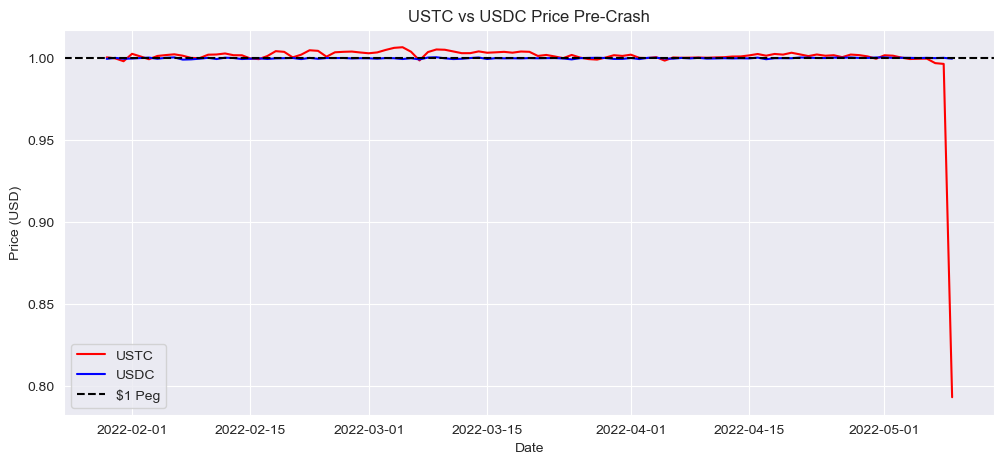

In [10]:
#testing time range
import seaborn as sns
data['date'] = pd.to_datetime(data['date'], utc=True, errors='coerce')
crash_date = pd.Timestamp('2022-05-09', tz='UTC')
pre_crash_start = crash_date - pd.Timedelta(days=100) #1 month in advance
pre_crash_data = data[(data['date'] >= pre_crash_start) & (data['date'] <= crash_date)]
plt.figure(figsize=(12,5))
plt.plot(pre_crash_data['date'], pre_crash_data['close_ustc'], label='USTC', color='red')
plt.plot(pre_crash_data['date'], pre_crash_data['close_usdc'], label='USDC', color='blue')
plt.axhline(1, color='black', linestyle='--', label='$1 Peg')
plt.title('USTC vs USDC Price Pre-Crash')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

#not much significant changes if time period too early pre-crash

In [11]:
#EDA
import seaborn as sns
crash_date = pd.Timestamp('2022-05-09', tz='UTC')
pre_crash_start = crash_date - pd.Timedelta(days=30) #1 month in advance
pre_crash_data = data[(data['date'] >= pre_crash_start) & (data['date'] <= crash_date)]

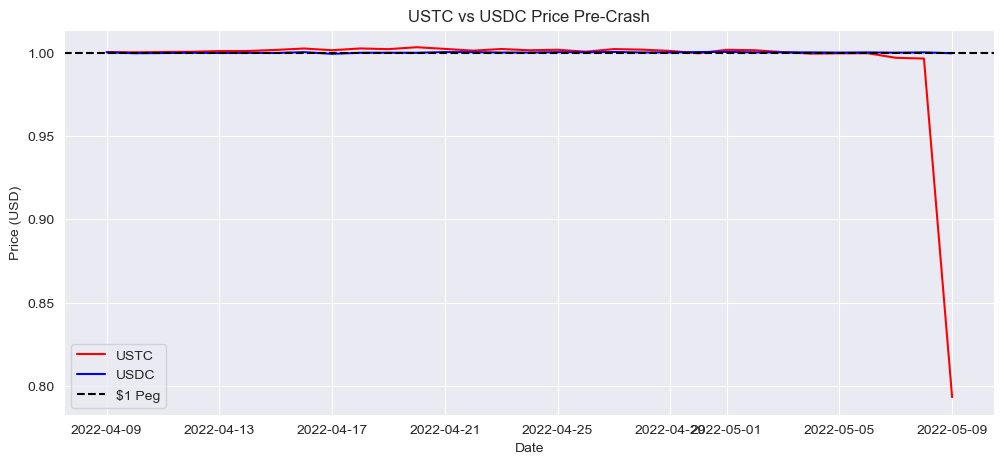

In [12]:
# 1. Price deviation from $1
plt.figure(figsize=(12,5))
plt.plot(pre_crash_data['date'], pre_crash_data['close_ustc'], label='USTC', color='red')
plt.plot(pre_crash_data['date'], pre_crash_data['close_usdc'], label='USDC', color='blue')
plt.axhline(1, color='black', linestyle='--', label='$1 Peg')
plt.title('USTC vs USDC Price Pre-Crash')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

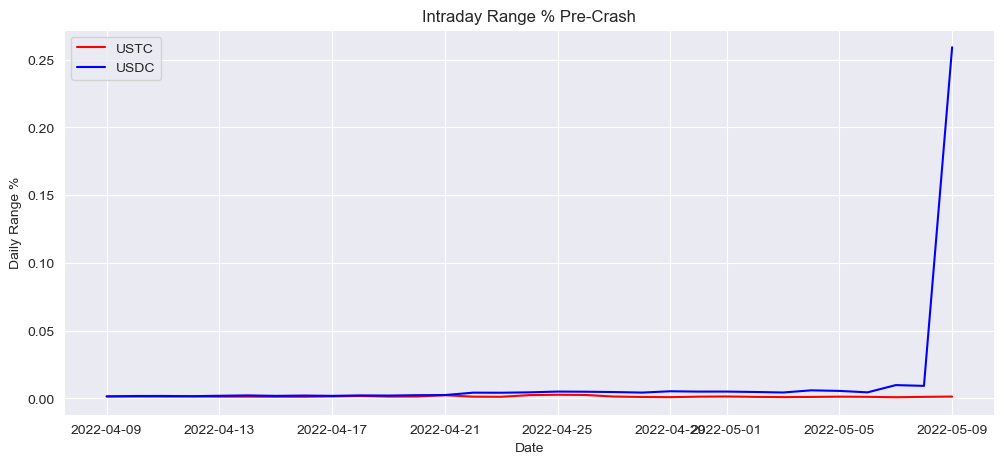

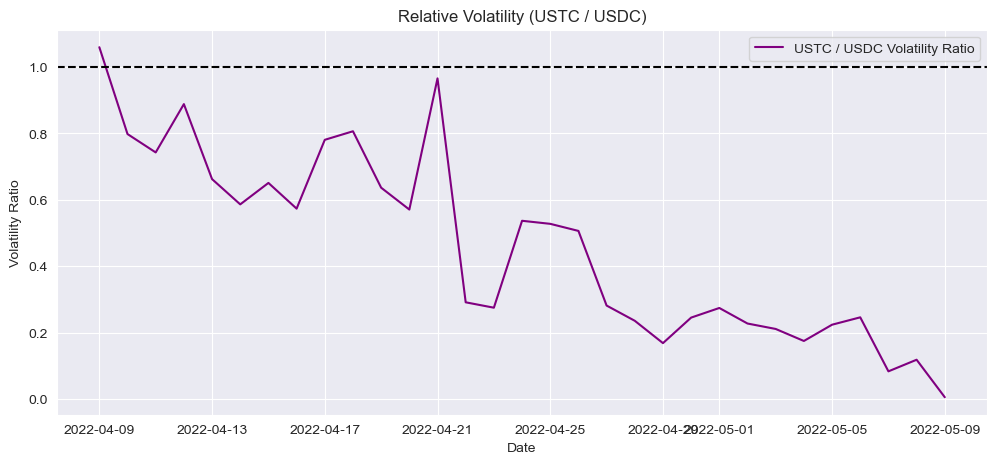

In [13]:
# 2. Volatility / daily swings
plt.figure(figsize=(12,5))
plt.plot(pre_crash_data['date'], pre_crash_data['intraday_range'], label='USTC', color='red')
plt.plot(pre_crash_data['date'], pre_crash_data['intraday_range_pct'], label='USDC', color='blue')
plt.title('Intraday Range % Pre-Crash')
plt.xlabel('Date')
plt.ylabel('Daily Range %')
plt.legend()
plt.show()

# Relative volatility
plt.figure(figsize=(12,5))
plt.plot(pre_crash_data['date'],
         pre_crash_data['intraday_range'] / pre_crash_data['intraday_range_pct'],
         label='USTC / USDC Volatility Ratio', color='purple')
plt.title('Relative Volatility (USTC / USDC)')
plt.axhline(1, color='black', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Volatility Ratio')
plt.legend()
plt.show()

#massive spike for intraday range % pre crash for ustc
#relative volatility general downwards trend to 0 so USTC became less volatile relative to USDC in the pre-crash window likely volatility supression

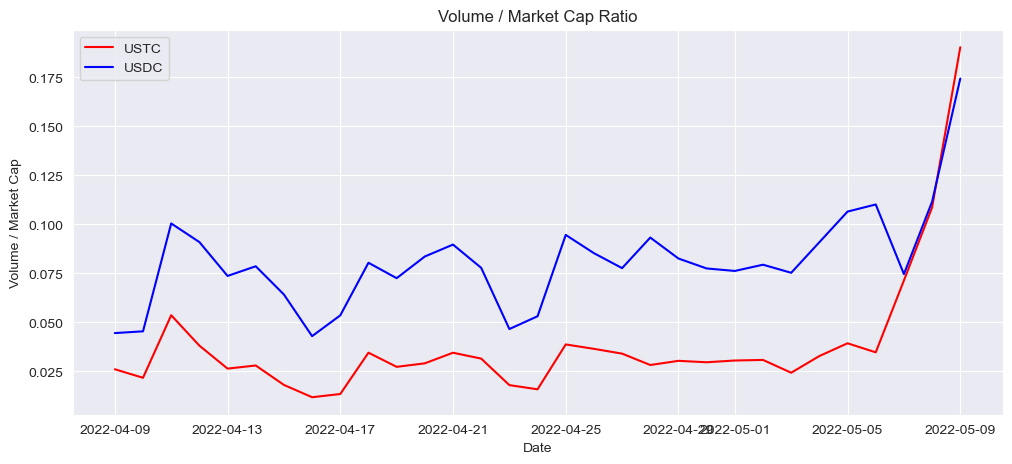

In [14]:
# 3. Volume / liquidity stress
plt.figure(figsize=(12,5))
plt.plot(pre_crash_data['date'], pre_crash_data['volume_mcap_ratio_ustc'], label='USTC', color='red')
plt.plot(pre_crash_data['date'], pre_crash_data['volume_mcap_ratio_usdc'], label='USDC', color='blue')
plt.title('Volume / Market Cap Ratio')
plt.xlabel('Date')
plt.ylabel('Volume / Market Cap')
plt.legend()
plt.show()

#no particular significant difference to be observed

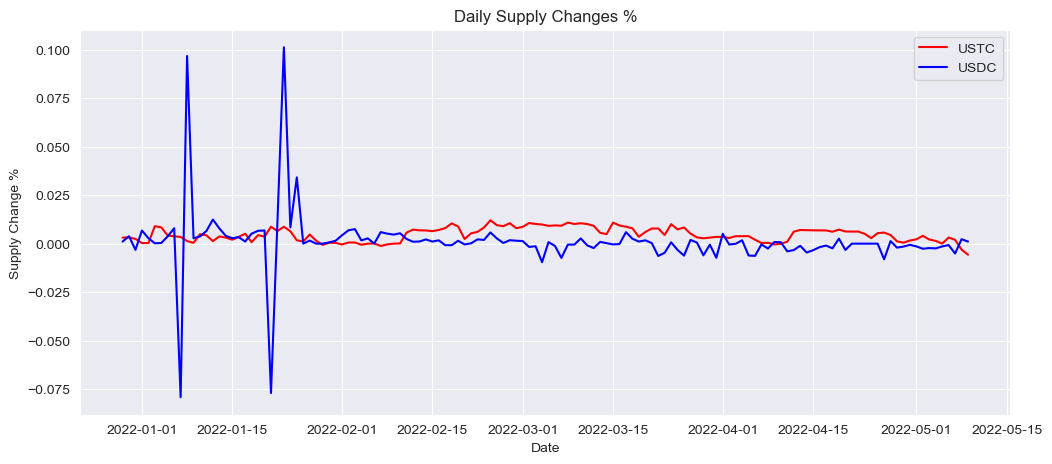

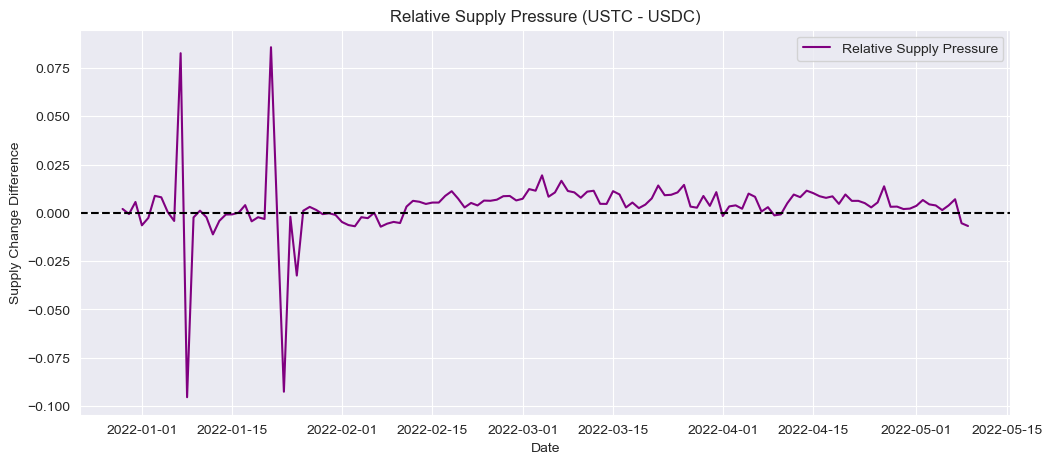

In [16]:
pre_crash_start = crash_date - pd.Timedelta(days=150) #1 month in advance
pre_crash_data = data[(data['date'] >= pre_crash_start) & (data['date'] <= crash_date)]

# 4. Supply changes / relative pressure
plt.figure(figsize=(12,5))
plt.plot(pre_crash_data['date'], pre_crash_data['circulatingSupply_ustc'].pct_change(), label='USTC', color='red')
plt.plot(pre_crash_data['date'], pre_crash_data['circulatingSupply_usdc'].pct_change(), label='USDC', color='blue')
plt.title('Daily Supply Changes %')
plt.xlabel('Date')
plt.ylabel('Supply Change %')
plt.legend()
plt.show()


# Relative supply pressure
plt.figure(figsize=(12,5))
plt.plot(pre_crash_data['date'],
         pre_crash_data['circulatingSupply_ustc'].pct_change() - pre_crash_data['circulatingSupply_usdc'].pct_change(),
         label='Relative Supply Pressure', color='purple')
plt.axhline(0, color='black', linestyle='--')
plt.title('Relative Supply Pressure (USTC - USDC)')
plt.xlabel('Date')
plt.ylabel('Supply Change Difference')
plt.legend()
plt.show()

#massive burning of USTC that led to the relative supply turning negative

/var/folders/1d/304spk_544j6rfmzkcz0plcr0000gn/T/ipykernel_1230/3680929779.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_crash_data['ew_score'] = (


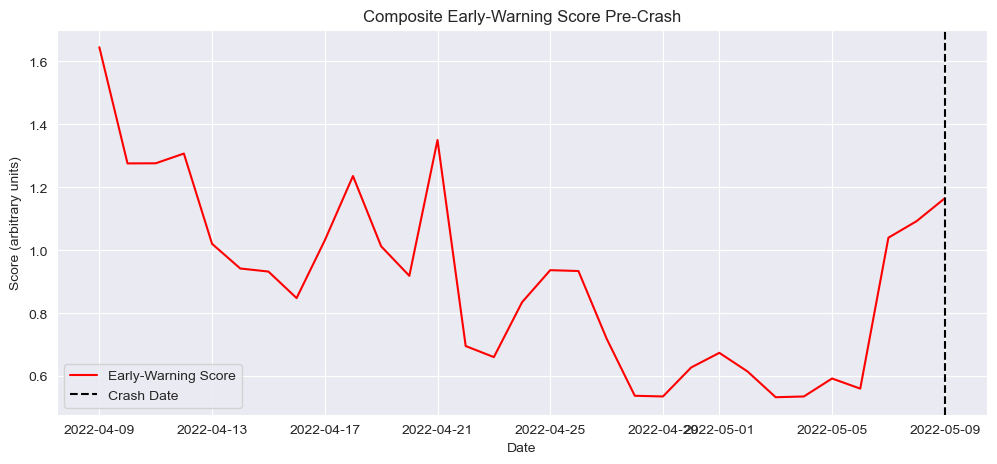

In [17]:
pre_crash_start = crash_date - pd.Timedelta(days=30) #1 month in advance
pre_crash_data = data[(data['date'] >= pre_crash_start) & (data['date'] <= crash_date)]
# 5. Composite Early-Warning Score
# built on how abnormal USTC behaves in comparison to USDC
pre_crash_data['ew_score'] = (
        pre_crash_data['dev_acceleration_ustc'].fillna(0).abs() +
        pre_crash_data['intraday_range'] / pre_crash_data['intraday_range_pct'] +
        pre_crash_data['volume_mcap_ratio_ustc'] / pre_crash_data['volume_mcap_ratio_usdc']
)

plt.figure(figsize=(12,5))
plt.plot(pre_crash_data['date'], pre_crash_data['ew_score'], label='Early-Warning Score', color='red')
plt.axvline(crash_date, color='black', linestyle='--', label='Crash Date')
plt.title('Composite Early-Warning Score Pre-Crash')
plt.xlabel('Date')
plt.ylabel('Score (arbitrary units)')
plt.legend()
plt.show()

#USTC can be observed to already be structurally unstable even before nearing the crash, volatility compression + risk accumulation at around 2022-04 to 05 leading up to the sudden spike.